In [10]:

import numpy as np
import matplotlib.pyplot as plt
import tensorflow_addons as tfa
from keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping
from keras.metrics import CategoricalAccuracy

# Import custom functions and models
from data_processing import segment_spectrum_batch
from RamanNet_model import RamanNet

In [9]:
import sys
sys.path.append('./RamanNet/source/codes/')  # Adjust this to your path
from RamanNet_model import RamanNet
# Import the train_model function
from train_model import train_model

In [16]:
from keras.callbacks import EarlyStopping

# Define the early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3, verbose=1, restore_best_weights=True)


In [12]:
import numpy as np

X_fn = './data/X_reference.npy'
y_fn = './data/y_reference.npy'

X = np.load(X_fn)
y = np.load(y_fn)

print(f"X shape: {X.shape}, y shape: {y.shape}")


X shape: (60000, 1000), y shape: (60000,)


In [13]:
from tensorflow.keras.utils import to_categorical

# One-hot encode the labels
Y_onehot = to_categorical(y)


In [14]:
from sklearn.model_selection import train_test_split

# Split the data into training and validation sets
X_train, X_val, Y_train_onehot, Y_val_onehot = train_test_split(X, Y_onehot, test_size=0.1, random_state=42)

print(f"X_train shape: {X_train.shape}, X_val shape: {X_val.shape}")
print(f"Y_train_onehot shape: {Y_train_onehot.shape}, Y_val_onehot shape: {Y_val_onehot.shape}")


X_train shape: (54000, 1000), X_val shape: (6000, 1000)
Y_train_onehot shape: (54000, 30), Y_val_onehot shape: (6000, 30)


Epoch 1/20
211/211 [==============================] - ETA: 0s - loss: 1.0181 - embedding_loss: 0.9572 - classification_loss: 1.0790 - embedding_categorical_accuracy: 4.8148e-04 - classification_categorical_accuracy: 0.6675
Epoch 1: val_loss improved from inf to 0.84128, saving model to best_model.h5


/usr/local/Caskroom/miniconda/base/lib/python3.9/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


211/211 [==============================] - 84s 314ms/step - loss: 1.0181 - embedding_loss: 0.9572 - classification_loss: 1.0790 - embedding_categorical_accuracy: 4.8148e-04 - classification_categorical_accuracy: 0.6675 - val_loss: 0.8413 - val_embedding_loss: 0.8636 - val_classification_loss: 0.8190 - val_embedding_categorical_accuracy: 1.6667e-04 - val_classification_categorical_accuracy: 0.7175 - lr: 0.0010
Epoch 2/20
211/211 [==============================] - ETA: 0s - loss: 0.6811 - embedding_loss: 0.9096 - classification_loss: 0.4526 - embedding_categorical_accuracy: 5.9259e-04 - classification_categorical_accuracy: 0.8459
Epoch 2: val_loss improved from 0.84128 to 0.54328, saving model to best_model.h5
211/211 [==============================] - 88s 414ms/step - loss: 0.6811 - embedding_loss: 0.9096 - classification_loss: 0.4526 - embedding_categorical_accuracy: 5.9259e-04 - classification_categorical_accuracy: 0.8459 - val_loss: 0.5433 - val_embedding_loss: 0.8100 - val_classific

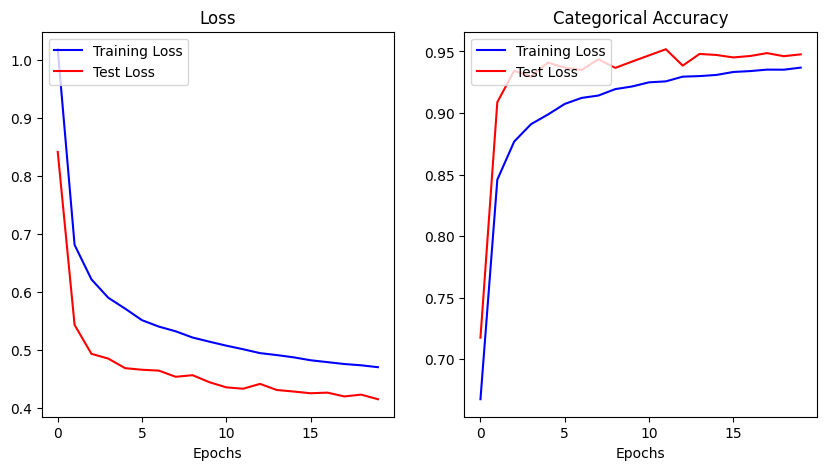

In [17]:

from keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
import matplotlib.pyplot as plt
import tensorflow_addons as tfa
from RamanNet_model import RamanNet
from data_processing import segment_spectrum_batch

# Example parameters
w_len = 50
dw = 25
epochs = 20
model_path = 'best_model.h5'

# Train the model
mdl, training_history = train_model(
    X_train=X_train,
    Y_train_onehot=Y_train_onehot,
    X_val=X_val,
    Y_val_onehot=Y_val_onehot,
    w_len=w_len,
    dw=dw,
    epochs=epochs,
    model_path=model_path,
    plot=True
)


Epoch 1/100
211/211 [==============================] - ETA: 0s - loss: 1.0122 - embedding_loss: 0.9565 - classification_loss: 1.0679 - embedding_categorical_accuracy: 0.0010 - classification_categorical_accuracy: 0.6724
Epoch 1: val_loss improved from inf to 0.78085, saving model to best_model.h5
211/211 [==============================] - 81s 314ms/step - loss: 1.0122 - embedding_loss: 0.9565 - classification_loss: 1.0679 - embedding_categorical_accuracy: 0.0010 - classification_categorical_accuracy: 0.6724 - val_loss: 0.7809 - val_embedding_loss: 0.8663 - val_classification_loss: 0.6954 - val_embedding_categorical_accuracy: 0.0000e+00 - val_classification_categorical_accuracy: 0.7762 - lr: 0.0010
Epoch 2/100
211/211 [==============================] - ETA: 0s - loss: 0.6825 - embedding_loss: 0.9106 - classification_loss: 0.4544 - embedding_categorical_accuracy: 0.0021 - classification_categorical_accuracy: 0.8455
Epoch 2: val_loss improved from 0.78085 to 0.56801, saving model to best_

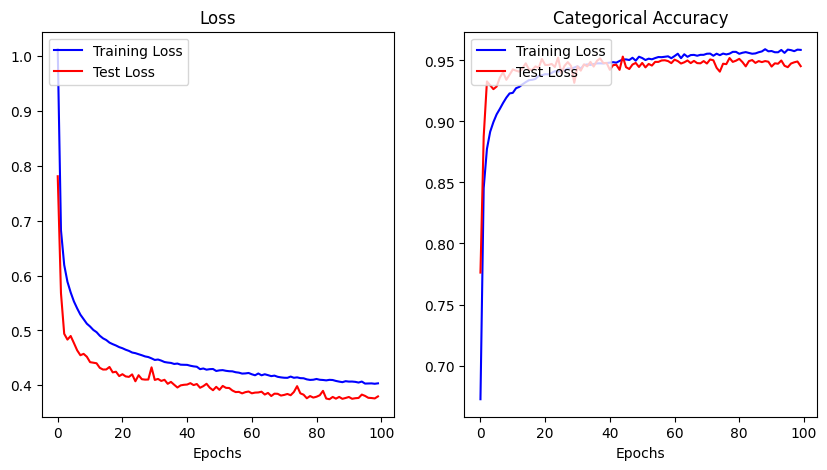

In [19]:

from keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
import matplotlib.pyplot as plt
import tensorflow_addons as tfa
from RamanNet_model import RamanNet
from data_processing import segment_spectrum_batch


w_len = 50
dw = 25
epochs = 100
model_path = 'best_model.h5'


mdl, training_history = train_model(
    X_train=X_train,
    Y_train_onehot=Y_train_onehot,
    X_val=X_val,
    Y_val_onehot=Y_val_onehot,
    w_len=w_len,
    dw=dw,
    epochs=epochs,
    model_path=model_path,
    plot=True
)

In [21]:

from tensorflow.keras.models import load_model


custom_objects = {"Addons>TripletSemiHardLoss": tfa.losses.TripletSemiHardLoss}
model = load_model(model_path, custom_objects=custom_objects)

# Make predictions
X_test_segmented = segment_spectrum_batch(X_val, w_len, dw)
y_pred = model.predict(X_test_segmented)


y_pred_classes = np.argmax(y_pred[1], axis=1)

# Evaluate the model on the validation data
from sklearn.metrics import confusion_matrix, accuracy_score
conf_matrix = confusion_matrix(np.argmax(Y_val_onehot, axis=1), y_pred_classes)
acc = accuracy_score(np.argmax(Y_val_onehot, axis=1), y_pred_classes)

print(f'Validation Accuracy: {acc * 100:.2f}%')

188/188 [==============================] - 2s 5ms/step
Validation Accuracy: 95.03%
